# Machine Learning Final Project 


# Data Introduction 

In [ ]:
import pandas as pd 

import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country', 'income']


# engine='python' to avoid warnings
df = pd.read_csv('adult.data', names=column_names, sep=', ', engine='python')
test_df = pd.read_csv('adult.test', names=column_names, sep=', ', skiprows=1, engine='python')

len(df) # 32561 samples 
df.head()


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Dataset name 'Census Income' 


# Data Exploration 

In [2]:
df.isnull().sum() #no missing values in the dataset

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [3]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Data Visualization

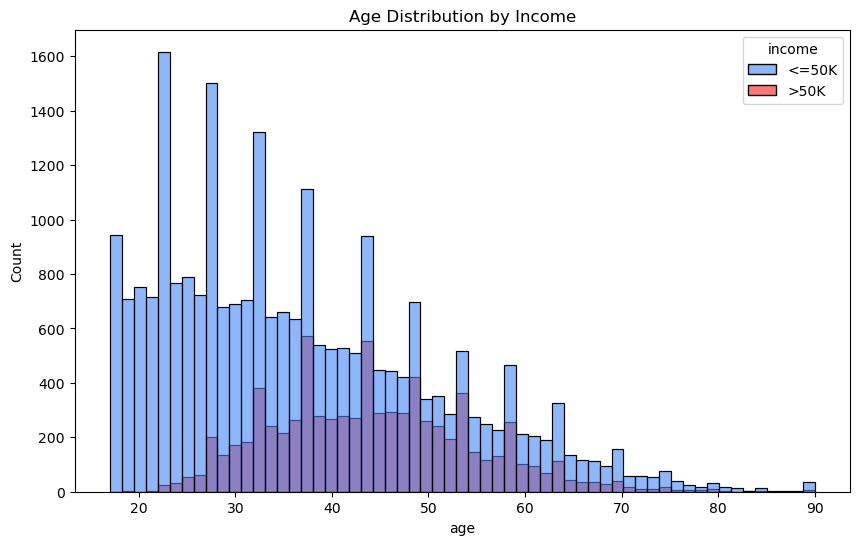

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', palette=['#4287f5', '#FF1E1E'], alpha=0.6)
plt.title('Age Distribution by Income')
plt.show()

### The visualizations significantly enhance our ability to interpret the dataset's key patterns. The Age Distribution by Income histogram reveals compelling age-related income trends by splitting the population into two groups: those earning above and below $50,000 annually. While younger age groups (around 20-25) show a higher concentration of individuals earning below $50,000, there's a notable shift in the 30-55 age range. This prime working age bracket not only contains the highest number of total workers but also shows the largest proportion of high earners (>$50,000), suggesting a strong correlation between age and earning potential.

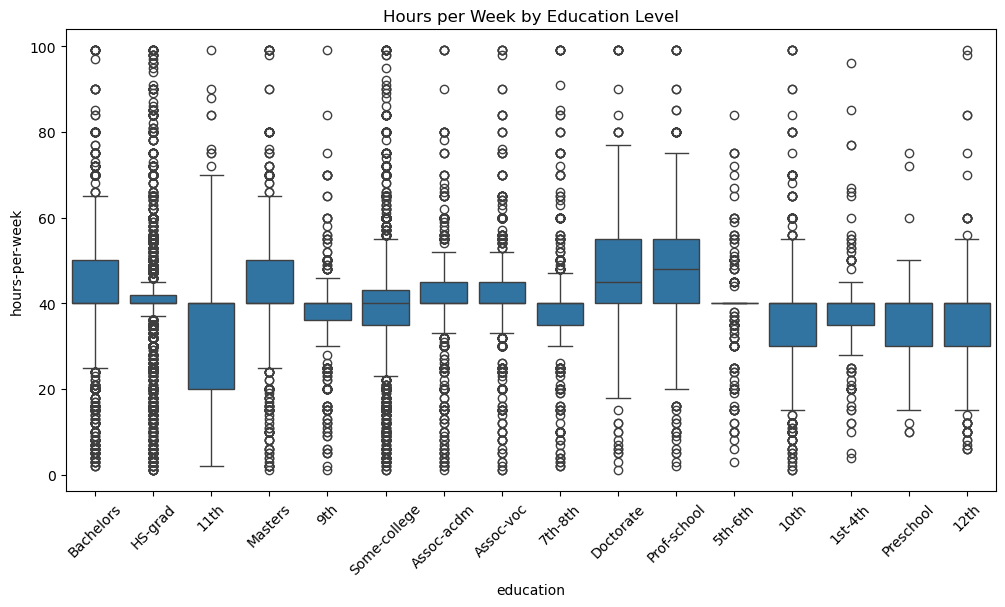

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='education', y='hours-per-week')
plt.xticks(rotation=45)
plt.title('Hours per Week by Education Level')
plt.show()

### The Hours per Week by Education Level box plot reveals some unexpected insights about work patterns across education levels. While conventional wisdom might suggest substantial differences in working hours based on education, the visualization shows remarkably consistent patterns. All education levels display similar distributions, with most groups having outliers extending to approximately 100 hours per week. Although those with Doctorate and Professional degrees show marginally higher median hours worked (indicated by the center line in each box), the overall variation between education levels is less pronounced than one might expect. This suggests that education level, while potentially influencing income, may not be a strong determinant of weekly working hours.

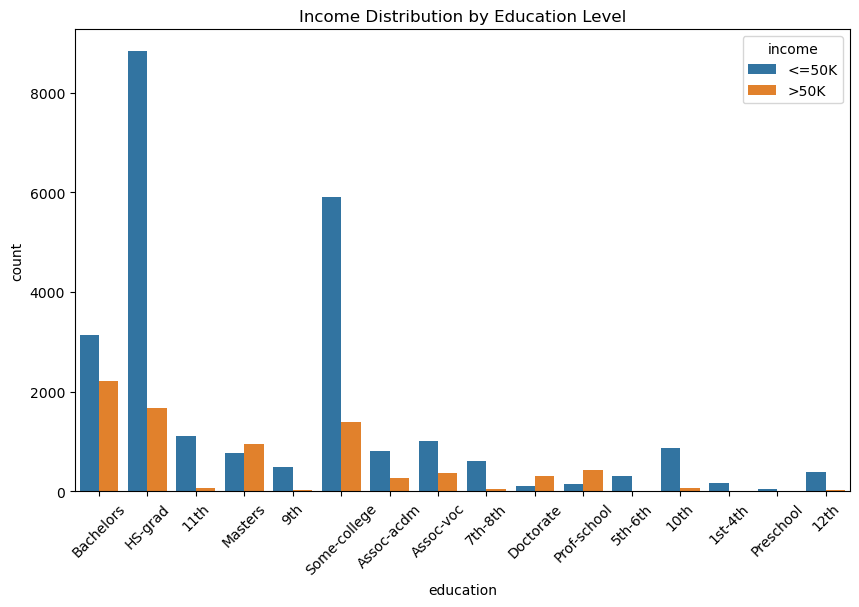

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.show()

### The Hours per Week by Education Level box plot reveals some unexpected insights about work patterns across education levels. While conventional wisdom might suggest substantial differences in working hours based on education, the visualization shows remarkably consistent patterns. All education levels display similar distributions, with most groups having outliers extending to approximately 100 hours per week. Although those with Doctorate and Professional degrees show marginally higher median hours worked (indicated by the center line in each box), the overall variation between education levels is less pronounced than one might expect. This suggests that education level, while potentially influencing income, may not be a strong determinant of weekly working hours.









## Data Preprocessing and Feature Engineering 

### (The dataset does not contain any null values and so no need to drop any rows.) 

### Jumping ahead to solving my problem of predicting income based on features, I believe its best to start preparing my dataframe based on the models I will use. Based on my dataset I have decided on using two ml models 'Logistic Regression' and 'Random Forest Classifier'. In order for these modesl to work as best as they can, I will make changes to my features in preparation. Starting with Logistic Regression, I will use One-hot encoding to convert categorical features into binary in order to allow my models to better interpret their features. I will standardize the features in order to reduce variability in order to improve the performance of my models.

In [7]:
### One Hot Encoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                      'relationship', 'race', 'sex', 'native-country']   #remove fnlwgt as it is not a useful feature 

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ])

# Process training data
X_train = preprocessor.fit_transform(df)
# Process test data using the SAME preprocessor (only transform, don't fit again)
X_test = preprocessor.transform(test_df)

# Get feature names
encoded_feature_names = (
    numerical_columns + 
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
)

# Create encoded dataframes
train_encoded = pd.DataFrame(X_train, columns=encoded_feature_names)
test_encoded = pd.DataFrame(X_test, columns=encoded_feature_names)

# Verify shapes
print("Training data shape:", train_encoded.shape)
print("Test data shape:", test_encoded.shape)
print("\nColumns:", encoded_feature_names)

Training data shape: (32561, 99)
Test data shape: (16281, 99)

Columns: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming

In [ ]:
## Scale and add the target column
from sklearn.preprocessing import StandardScaler
X_train = preprocessor.fit_transform(df)
X_test = preprocessor.transform(test_df) 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)






""" 
Error caused by income label  in test and train not being consistent. Corrected by removing periods from the test data.
"""

def clean_income_labels(df):
   
    df['income'] = df['income'].str.strip().str.rstrip('.')
    
    return df['income'].map({'<=50K': 0, '>50K': 1})


y_train = clean_income_labels(df)
y_test = clean_income_labels(test_df)






In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


# Evaluate both models
print("Logistic Regression Results:")
print(f"Accuracy Score: {accuracy_score(y_test, lr_pred):.4f}")
print(classification_report(y_test, lr_pred))
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, lr_pred))

print("\nRandom Forest Results:")
print(f"Accuracy Score: {accuracy_score(y_test, rf_pred):.4f}")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, rf_pred))


Logistic Regression Results:
Accuracy Score: 0.8520
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281


Confusion Matrix (Logistic Regression):
[[11578   857]
 [ 1552  2294]]

Random Forest Results:
Accuracy Score: 0.8447
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.70      0.61      0.65      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.76      0.77     16281
weighted avg       0.84      0.84      0.84     16281


Confusion Matrix (Random Forest):
[[11416  1019]
 [ 1509  2337]]


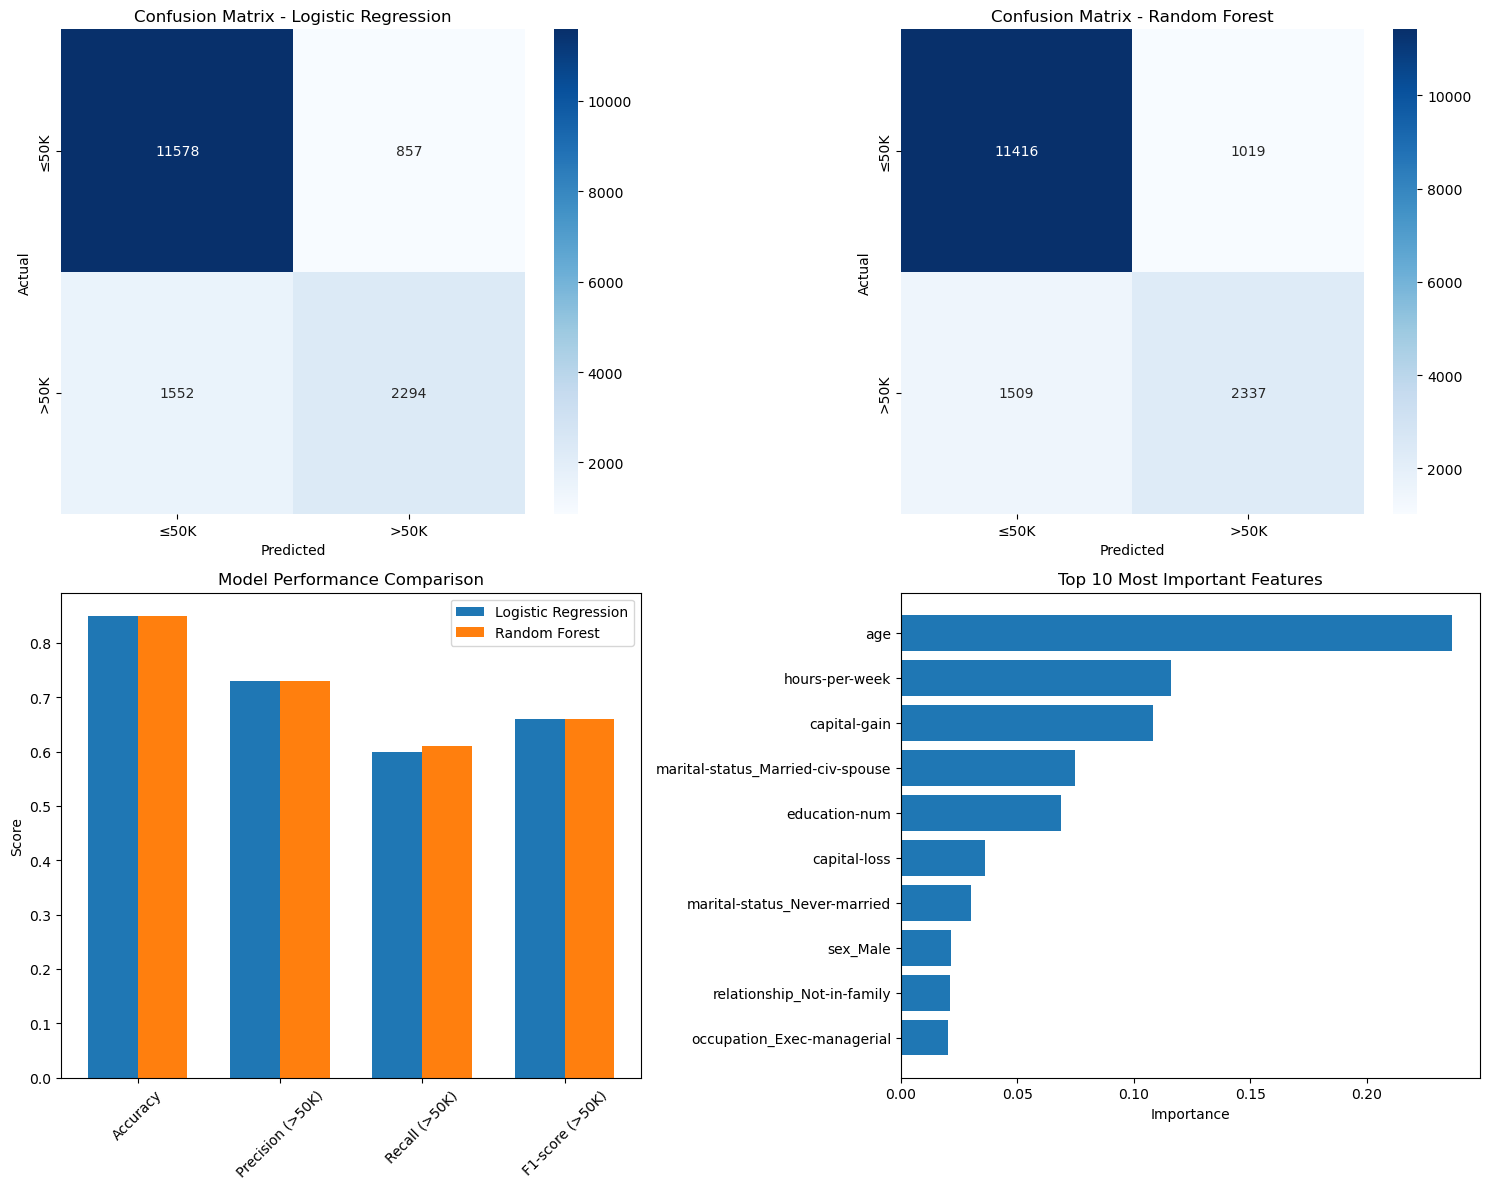

In [10]:


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix Heatmap for Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['≤50K', '>50K'],
            yticklabels=['≤50K', '>50K'],
            ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix - Logistic Regression')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# Confusion Matrix Heatmap for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['≤50K', '>50K'],
            yticklabels=['≤50K', '>50K'],
            ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix - Random Forest')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# Model Performance Comparison
metrics = ['Accuracy', 'Precision (>50K)', 'Recall (>50K)', 'F1-score (>50K)']
lr_scores = [0.85, 0.73, 0.60, 0.66]
rf_scores = [0.85, 0.73, 0.61, 0.66]

x = np.arange(len(metrics))
width = 0.35

axes[1,0].bar(x - width/2, lr_scores, width, label='Logistic Regression')
axes[1,0].bar(x + width/2, rf_scores, width, label='Random Forest')
axes[1,0].set_ylabel('Score')
axes[1,0].set_title('Model Performance Comparison')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(metrics, rotation=45)
axes[1,0].legend()

# Feature Importance for Random Forest
importances = rf_model.feature_importances_
top_10_idx = np.argsort(importances)[-10:]
top_10_features = train_encoded.columns[top_10_idx]
top_10_importance = importances[top_10_idx]


axes[1,1].barh(np.arange(len(top_10_features)), top_10_importance)
axes[1,1].set_yticks(np.arange(len(top_10_features)))
axes[1,1].set_yticklabels(top_10_features)
axes[1,1].set_title('Top 10 Most Important Features')
axes[1,1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

## Evaluate Performance


### From the initial results, both Random Forest and Logistic Regression models demonstrate strong performance, achieving approximately 85% accuracy. While their overall performance metrics are similar, the Random Forest model offers additional insights through its ability to capture complex feature interactions and provide feature importance rankings. The analysis reveals that demographic and economic factors heavily influence income prediction, with age emerging as the most significant predictor, followed by hours-per-week, capital-gain, marital status (married), and education level. Other notable influential features include capital-loss, marital status (never married), gender (male), relationship status, and executive occupations.                     

### These findings raise important questions that warrant further investigation. I plan to conduct some experiments in order to validate my understanding. 

### - Test model performance with different feature combinations 
### - Examine how the removal of high-importance features affects model accuracy 


In [11]:
# Experiment 1 

# feature set 
# Feature sets
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
top_5_features = ['age', 'hours-per-week', 'capital-gain', 'marital-status', 'education-num']

feature_sets = {
    'all_features': numerical_features + categorical_features,  
    'only_numerical': numerical_features,
    'only_categorical': categorical_features,
    'top_5': top_5_features
}

results_experiment_1 = {}

for name, features in feature_sets.items():
    
    num_feat = [f for f in features if f in numerical_features]
    cat_feat = [f for f in features if f in categorical_features]
    
    transformer = []
    if num_feat:
        transformer.append(('num', StandardScaler(), num_feat))
    if cat_feat:
        transformer.append(('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feat))
    
    preprocessor = ColumnTransformer(transformers=transformer)
    
   
    X_train_new = preprocessor.fit_transform(df[features])
    X_test_new = preprocessor.transform(test_df[features])
    
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    rf_model = RandomForestClassifier(random_state=42)
    
    lr_model.fit(X_train_new, y_train)
    rf_model.fit(X_train_new, y_train)
    
    results_experiment_1[f'{name}_lr'] = accuracy_score(y_test, lr_model.predict(X_test_new))
    results_experiment_1[f'{name}_rf'] = accuracy_score(y_test, rf_model.predict(X_test_new))

# Print results
print("\nExperiment 1 Results - Different Feature Sets:")
for k, v in results_experiment_1.items():
    print(f"{k}: {v:.4f}")




Experiment 1 Results - Different Feature Sets:
all_features_lr: 0.8520
all_features_rf: 0.8447
only_numerical_lr: 0.8128
only_numerical_rf: 0.8234
only_categorical_lr: 0.8354
only_categorical_rf: 0.8247
top_5_lr: 0.8394
top_5_rf: 0.8342


In [12]:
# Experiment 2 


# Removing the top 3 most important features


features_to_remove = ['age', 'hours-per-week', 'capital-gain']
results_experiment_2 = {}

for i in range(len(features_to_remove)):
    
    excluded_features = features_to_remove[:i+1]
   
    current_features = [f for f in numerical_features + categorical_features 
                       if f not in excluded_features]
    
    
    num_feat = [f for f in current_features if f in numerical_features]
    cat_feat = [f for f in current_features if f in categorical_features]
    
    transformer = []
    if num_feat:
        transformer.append(('num', StandardScaler(), num_feat))
    if cat_feat:
        transformer.append(('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feat))
    
    preprocessor = ColumnTransformer(transformers=transformer)
    
    
    X_train_new = preprocessor.fit_transform(df[current_features])
    X_test_new = preprocessor.transform(test_df[current_features])
    
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    rf_model = RandomForestClassifier(random_state=42)
    
    lr_model.fit(X_train_new, y_train)
    rf_model.fit(X_train_new, y_train)
    
    remove = '+'.join(excluded_features)
    results_experiment_2[f'remove_{remove}_lr'] = accuracy_score(y_test, lr_model.predict(X_test_new))
    results_experiment_2[f'remove_{remove}_rf'] = accuracy_score(y_test, rf_model.predict(X_test_new))

# Print results
print("\nExperiment 2 Results - Removing top 3 Important Features:")
for k, v in results_experiment_2.items():
    print(f"{k}: {v:.4f}")


Experiment 2 Results - Removing top 3 Important Features:
remove_age_lr: 0.8507
remove_age_rf: 0.8444
remove_age+hours-per-week_lr: 0.8522
remove_age+hours-per-week_rf: 0.8514
remove_age+hours-per-week+capital-gain_lr: 0.8374
remove_age+hours-per-week+capital-gain_rf: 0.8292
